# EXPLORATION_1: 가위바위보 분류기 만들기

In [1]:
# PIL 라이브러리가 설치되어 있지 않다면 설치
!pip install pillow   

from PIL import Image
import os, glob
import numpy as np

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [2]:
import os
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/train/scissor"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("가위 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/ssac10/aiffel/rock_scissor_paper/train/scissor
가위 이미지 resize 완료!


In [3]:
import os
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/train/rock"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("바위 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/ssac10/aiffel/rock_scissor_paper/train/rock
바위 이미지 resize 완료!


In [4]:
import os
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/train/paper"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("보 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/ssac10/aiffel/rock_scissor_paper/train/paper
보 이미지 resize 완료!


In [5]:
def load_data(img_path, number):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=number   # 가위바위보 이미지 개수 총합에 주의하세요.
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/train"
(x_train, y_train) = load_data(image_dir_path, 3000)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 3000 입니다.
x_train shape: (3000, 28, 28, 3)
y_train shape: (3000,)


라벨:  1


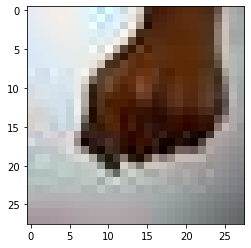

In [6]:
import matplotlib.pyplot as plt
plt.imshow(x_train[1999])
print('라벨: ', y_train[1999])

In [7]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

n_channel_1=16
n_channel_2=32
n_dense=64
n_train_epoch=15

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                51264     
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 1

In [8]:
print("Before Reshape - x_train_norm shape: {}".format(x_train_norm.shape))

x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 3)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.

print("After Reshape - x_train_reshaped shape: {}".format(x_train_reshaped.shape))

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=n_train_epoch)

Before Reshape - x_train_norm shape: (3000, 28, 28, 3)
After Reshape - x_train_reshaped shape: (3000, 28, 28, 3)
Epoch 1/15
94/94 [==============================] - 3s 33ms/step - loss: 1.0534 - accuracy: 0.4293
Epoch 2/15
94/94 [==============================] - 0s 2ms/step - loss: 0.8199 - accuracy: 0.6390
Epoch 3/15
94/94 [==============================] - 0s 2ms/step - loss: 0.6058 - accuracy: 0.7600
Epoch 4/15
94/94 [==============================] - 0s 2ms/step - loss: 0.4547 - accuracy: 0.8300
Epoch 5/15
94/94 [==============================] - 0s 2ms/step - loss: 0.3435 - accuracy: 0.8757
Epoch 6/15
94/94 [==============================] - 0s 2ms/step - loss: 0.2482 - accuracy: 0.9170
Epoch 7/15
94/94 [==============================] - 0s 2ms/step - loss: 0.1952 - accuracy: 0.9387
Epoch 8/15
94/94 [==============================] - 0s 2ms/step - loss: 0.1475 - accuracy: 0.9547
Epoch 9/15
94/94 [==============================] - 0s 2ms/step - loss: 0.1343 - accuracy: 0.9563
Epoc

학습데이터(x_train)의 이미지 개수는 2520 입니다.
Before Reshape - x_test_norm shape: (2520, 28, 28, 3)
After Reshape - x_test_reshaped shape: (2520, 28, 28, 3)
x_test shape: (2520, 28, 28, 3)
y_test shape: (2520,)
라벨:  0


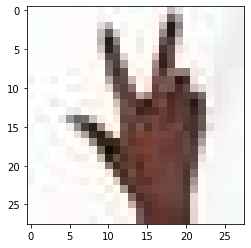

In [9]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/testset2"
(x_test, y_test)=load_data(image_dir_path, 2520)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("Before Reshape - x_test_norm shape: {}".format(x_test_norm.shape))

x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 3)

print("After Reshape - x_test_reshaped shape: {}".format(x_test_reshaped.shape))


print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

# 불러온 이미지 확인
import matplotlib.pyplot as plt
plt.imshow(x_test[0])
print('라벨: ', y_test[0])

In [10]:
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

79/79 - 0s - loss: 1.7189 - accuracy: 0.6202
test_loss: 1.718894124031067 
test_accuracy: 0.6202380657196045


# 회고록

  오늘은 아이펠 첫 Exploration 노드를 진행하였다. 나는 이론보다는 실전파라 더 기대가 되는 날이었다. 매번 인터넷으로만 보던 딥러닝 모델을 내가 직접 구현해볼 수 있는 아주 좋은 기회였다. 물론 처음부터 모든 코드를 내가 짠 것은 아니지만, 지금은 어떻게 작동을 하는지 그 원리를 이해하고 익히는 것이 중요하다고 생각한다. 처음에는 노드를 열심히 따라가면서 코드를 하나하나 실행시켜 보는 것으로 시작해서, 가위바위보를 분류하는 모델은 앞서 모델링되어있는 자료를 참고하여 내가 직접 복붙(?)한 코드이다. 물론 MNIST를 이용한 숫자 분류와는 조금 다른 부분이 있어서 해당 부분만 수정할 줄 안다면 그다지 어렵지 않은 과제였다. 라고 생각했던 때가 있었지...

처음 100개의 데이터 가지고 실행했을 때 결과는 처참했다...

![image02.png](./images/image02.png)

총 10명 분량을 train set으로 사용하고 test를 돌렸을 때 가장 잘 나온 결과!

![image03.png](./images/image03.png)

오늘은 Layer를 추가하지 않고 단순히 Hyperparameter만 조정하여 인식률을 높이는 것을 목표로 했다. 우선 데이터가 부족한 것 같아서 10명 보다 더 많은 데이터를 추가해보면 좋을 것 같다. 아직 첫 모델이라 많이 부족했지만, 그래도 뭔가 목표가 있고 무엇을 해야 하는지 알게 되면 딥러닝이 조금 더 재밌어질 것 같다.